# </a><center>Palmer Penguins Exploratory Data Analysis</center>

---

by *Irina Simoes*

**Table of contents**<a id='toc0_'></a>    
- 1. [Introduction](#toc1_)    
  - 1.1. [About the dataset](#toc1_1_)    
  - 1.2. [Analysis goal](#toc1_2_)    
- 2. [Load Libraries & Dataset](#toc2_)    
  - 2.1. [Import all the required libraries for the analysis](#toc2_1_)    
  - 2.2. [Acquiring and loading the dataset](#toc2_2_)    
- 3. [Overview & Basic Exploration](#toc3_)    
  - 3.1. [Check for the DataFrame dimensionality with pandas `.info()` method](#toc3_1_)    
  - 3.2. [Get a first look at the data with pandas `.sample` method ](#toc3_2_)    
  - 3.3. [Generate descriptive statistics with pandas `.describe` method ](#toc3_3_)    
  - 3.4. [X Action Items](#toc3_4_)    
- 4. [Data Cleaning & Wrangling](#toc4_)    
- 5. [Data Analysis](#toc5_)    
  - 5.1. [Univariate Analysis](#toc5_1_)    
    - 5.1.1. [Numeric variables](#toc5_1_1_)    
    - 5.1.2. [Categorical variables](#toc5_1_2_)    
  - 5.2. [Bivariate Analysis](#toc5_2_)    
  - 5.3. [Multivariate Analysis](#toc5_3_)    
- 6. [Insights and Conclusion](#toc6_)    
- 7. [Notes](#toc7_)    
- 8. [End](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---
## 1. <a id='toc1_'></a>[Introduction](#toc0_)

### 1.1. <a id='toc1_1_'></a>[About the dataset](#toc0_)

This notebook explores the different variables of [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/articles/intro.html), which was first introduced by Allison Horst, Alison Hill, and Kristen Gorman in 2020. The dataset is a collection of data about three different species of penguins inhabiting the Palmer Archipelago near Palmer Station in Antarctica, which were collected from 2007 to 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network.

### 1.2. <a id='toc1_2_'></a>[Analysis goal](#toc0_)
For this exploratory data analysis <sup>[1]</sup><sup>[2]</sup><sup>[3]</sup>, we will focus on exploring the data to gain insights on the underlying attributes with the end goal of uncovering patterns and identifying dependencies. Namely, we will seek to explore the [correlation between two of the variables](https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f), regardless of whether they are causal or not.

<sup>[1] <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-in-python">Exploratory Data Analysis</a></sup><br><sup>[2] <a href="https://www.geeksforgeeks.org/exploratory-data-analysis-in-python-set-1/">Exploratory Data Analysis in Python | Set 1</a></sup><br><sup>[3] <a href="https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/">What is Exploratory Data Analysis?</a></sup>


---
## 2. <a id='toc2_'></a>[Load Libraries & Dataset](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Import all the required libraries for the analysis](#toc0_)
* [Seaborn](https://seaborn.pydata.org/): Data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.

* [Pandas](https://pandas.pydata.org): Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.

* [Numpy](https://numpy.org/): It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.

* [Matplotlib](https://matplotlib.org/): Essential for creating static, animated,  and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.2. <a id='toc2_2_'></a>[Acquiring and loading the dataset](#toc0_)

As stated in the [official documentation for the Seaborn library](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), datasets can be loaded from an [online repository](https://github.com/mwaskom/seaborn-data):

First by executing `get_dataset_names()` to confirm if Palmer Penguins is indeed listed as one of the 
of available datasets;

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

Secondly by calling `seaborn.load_dataset()` function with the actual database name, namely penguins, we load it into our project. The dataset returned is a [DataFrame object by default](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), as the Seaborn library is closely [integrated with pandas data structures](https://seaborn.pydata.org/tutorial/introduction). Consequently, the loaded dataset comprises a [2-dimensional data structure](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) with rows and columns.



In [3]:
df = sns.load_dataset("penguins")

---
## 3. <a id='toc3_'></a>[Overview & Basic Exploration](#toc0_)

We should get a basic understanding of the data structure, format, and characteristics by inspecting the dataset's dimension, data types, presence of missing values and/or duplicate records, as well as exploring some initial summary statistics. In order to achieve this we'll be using methods and attributes available through pandas DataFrame object. <sup>[1]</sup><sup>[2]</sup>


<sup>[1] <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html">pandas.DataFrame Official Documentation</a>
</sup><br><sup>[2] <a href="https://medium.com/codex/10-efficient-ways-for-inspecting-a-pandas-dataframe-object-3f66563e2f2">10 Efficient Ways for Inspecting a Pandas DataFrame Object</a>


### 3.1. <a id='toc3_1_'></a>[Check for the DataFrame dimensionality with pandas `.info()` method](#toc0_)

**Rationale:** The goal is to return a summary with the column headers, total number of rows and columns, count of non-null values, and data types, as per [pandas official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html). We can then understand the size and structure of the dataset before performing further analysis. 

**Findings:**

* The set contains 344 rows and 7 columns.
* 4 variables are numeric with type ``float64``: _culmen length in mm, culmen depth in mm, flipper length in mm, and body mass in rams_.
* 3 variables are categorical with type ``object``: _species, island, and sex_. 
* 5 of the columns have missing values, which means we'll have to some data wrangling and clean up before any data analsysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### 3.2. <a id='toc3_2_'></a>Get a first look at the data with pandas `.sample` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)  [&#8593;](#toc0_)

In [5]:
print("-------- Head -------- \n", df.head(5),"\n\n-------- Tail -------- \n", df.tail(5)) 

-------- Head -------- 
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female   

-------- Tail -------- 
     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8           

### 3.3. <a id='toc3_3_'></a>Generate descriptive statistics with pandas `.describe` [method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)  [&#8593;](#toc0_)


**Rationale:** 
Understand the distribution of numerical data with percentile attribution and a provide a quick summary that will helps us understand the penguins' characteristics central tendency, variability, and range.<sup>[1]</sup> It includes the following statistics:<sup>[2]</sup>

- Count: This represents the number of non-null (non-missing) values in the dataset for each column. It gives an indication of how many observations are present.

- Mean: It's a measure of central tendency, as it constitutes the average value of the data.

- Standard deviation: It indicates how spread out the values are around the mean. A higher standard deviation means the values are more spread out from the mean, while a lower standard deviation means the values are closer to the mean.

- Minimum: It represents the lowest observed value in the dataset.

- First quartile (25th percentile): It's a value below which 25% of the observations lie. 

- Second quartile (50th percentile): It represents the median, separating the higher half from the lower half of the data. 

- Third quartile (75th percentile): It's a value below which 75% of the observations lie. 

- Maximum: It represents the highest observed value in the dataset.

**Findings:**  Key interpretations can be made from this function, both for the quantitative and categorical data. All of these observations require further exploration on an individual basis.

- Null values: Confirming the observations made from `.info`, the count of rows does not match the count of values for _bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g,_ and _sex_. 

- Outliers: _body_mass_g_ max value seems to be significantly greater than the mean, median and 75th percentile, which can potentially indicate the presence of outliers. 

- Number of classes: _sex_ column contains two categories, while species and islands are multi-class, indicating three different categories. Further validation required when examining the categorical variables.


<sup>[1] <a href="https://medium.com/codex/9-efficient-ways-for-describing-and-summarizing-a-pandas-dataframe-316234f46e6">9 Efficient Ways for Describing and Summarizing a Pandas DataFrame</a></sup>
<sup><br>[2] <a href="https://medium.com/@muralimanohar6/leveraging-the-way-you-interpret-the-descriptive-statistics-in-python-bd2111fb5211">Leveraging the way you interpret the “Descriptive Statistics” in Python</a>




In [6]:
# By default, describe() includes only numeric columns, so the param include 
# should be specified for variables of object data type
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### 3.4. <a id='toc3_4_'></a>[X Action Items](#toc0_)

✅ Item 1

❌ Item 2

## 4. <a id='toc4_'></a>[Data Cleaning & Wrangling](#toc0_)

As seen in the descriptive summary above, the dataset contains a few missing values which should be investigated. To detect these missing values, we use the `isna()` method.

Check if normalisation is required due to formatting inconsistencies, e.g N/A,na or 0/0.0 as per [Data Cleaning with Python and Pandas: Detecting Missing Values](https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b)

References:

[Working with missing data](https://pandas.pydata.org/docs/user_guide/missing_data.html)

[Working with Missing Data in Pandas](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
_Is the missing numerical data all in the same rows? Explore that._

In [7]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

It seems that record 3 can be dropped as well as record 339. Not sure what to do yet with the other 9 rows with missing values in the sex variable.

In [8]:
df[df['sex'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


To delete rows from the DataFrame we'll use the `.drop()` function, which references the rows based on their “index values“.

[pandas.DataFrame.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

[Delete Rows & Columns in DataFrames Quickly using Pandas Drop](https://www.shanelynn.ie/pandas-drop-delete-dataframe-rows-columns/)


In [9]:
# Set inplace as True, otherwise a copy will be returned
df.drop(index=[3,339],inplace=True)

In [10]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

---
## 5. <a id='toc5_'></a>[Data Analysis](#toc0_)

https://medium.com/@nomannayeem/mastering-exploratory-data-analysis-eda-a-comprehensive-python-pandas-guide-for-data-insights-c0be7c5b8889

### 5.1. <a id='toc5_1_'></a>[Univariate Analysis](#toc0_)

#### 5.1.1. <a id='toc5_1_1_'></a>[Numeric variables](#toc0_)

#### 5.1.2. <a id='toc5_1_2_'></a>[Categorical variables](#toc0_)

### 5.2. <a id='toc5_2_'></a>[Bivariate Analysis](#toc0_)

***I. Sex distribution***

As in https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html#sphx-glr-gallery-lines-bars-and-markers-bar-label-demo-py



NameError: name 'Normalize' is not defined

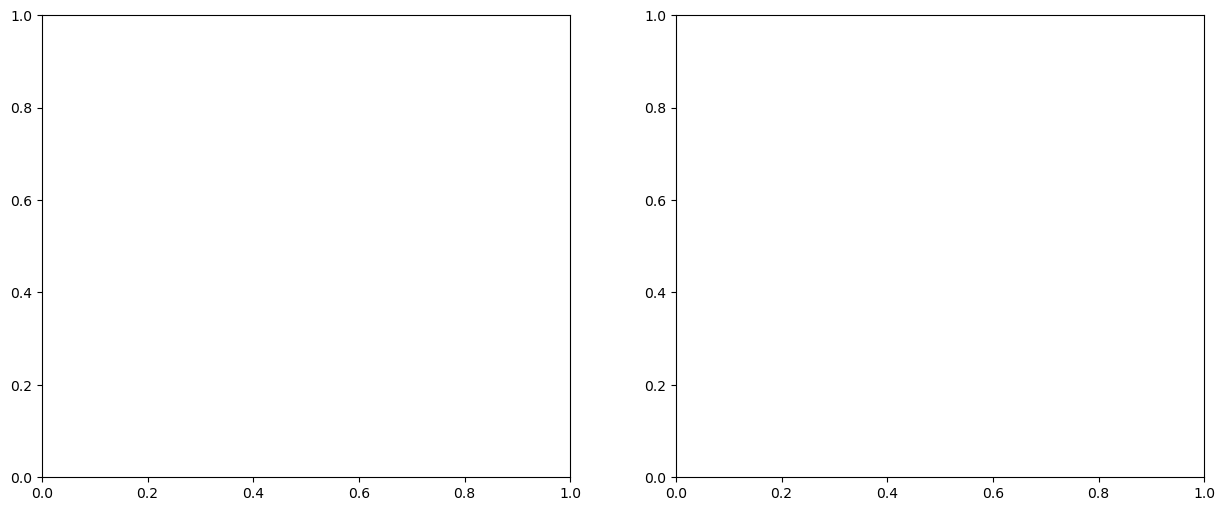

In [57]:

# Pivot the d to create a table suitable for plotting stacked bar chart
pivot_table_species = df.pivot_table(index='species', columns='sex', aggfunc='size', fill_value=0)
pivot_table_island = df.pivot_table(index='island', columns='sex', aggfunc='size', fill_value=0)

# Define the width of the bars
width = 0.6

# Create the plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Initialize bottom values for stacking bars
bottom_species = np.zeros(len(pivot_table_species.index))
bottom_island = np.zeros(len(pivot_table_island.index))

# Define the diverging color palette
cmap = sns.diverging_palette(20, 220, as_cmap=True)

# Plot stacked bars for species
for i, sex in enumerate(pivot_table_species.columns):
    p_species = ax[0].bar(pivot_table_species.index, pivot_table_species.iloc[:, i], width, label=sex, bottom=bottom_species, color=cmap(i / len(pivot_table_species.columns)))
    bottom_species += pivot_table_species.iloc[:, i]

    # Add labels to the bars
    ax[0].bar_label(p_species, label_type='center')

# Plot stacked bars for island
for i, sex in enumerate(pivot_table_island.columns):
    p_island = ax[1].bar(pivot_table_island.index, pivot_table_island.iloc[:, i], width, label=sex, bottom=bottom_island, color=cmap(i / len(pivot_table_island.columns)))
    bottom_island += pivot_table_island.iloc[:, i]

    # Add labels to the bars
    ax[1].bar_label(p_island, label_type='center')

# Add labels and title for the first plot
ax[0].set_title('Number of penguins by species')
ax[0].legend()

# Add labels and title for the second plot
ax[1].set_title('Number of penguins by island')
ax[1].legend()

plt.tight_layout()
plt.show()

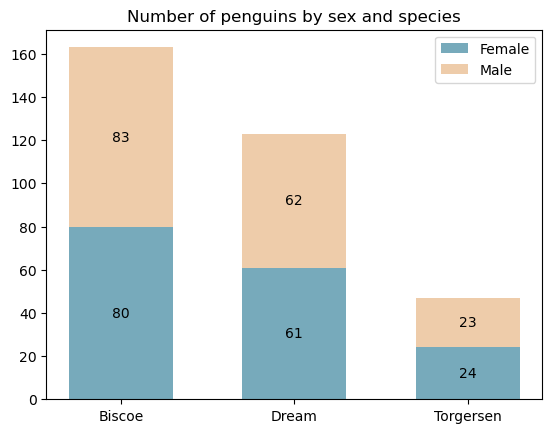

In [38]:
# Pivot the dataframe to create a table suitable for plotting stacked bar chart
pivot_table = df.pivot_table(index='island', columns='sex', aggfunc='size', fill_value=0)

# Convert the index and columns to arrays
island = pivot_table.index
sex_counts = pivot_table.values

# Create the plot and set formatting settings
width = 0.6
color_palette = ['#7AB', '#ECA']
fig, ax = plt.subplots()

# Initialize bottom values for stacking bars
bottom = np.zeros(len(island))

# Iterate over sex counts and plot stacked bars
for i, sex in enumerate(pivot_table.columns):
    p = ax.bar(island, sex_counts[:, i], width, label=sex, bottom=bottom, color=color_palette[i])
    bottom += sex_counts[:, i]

    # Add labels
    ax.bar_label(p, label_type='center')

# Add legend and title
ax.set_title('Number of penguins by sex and species')
ax.legend()

plt.show()

### 5.3. <a id='toc5_3_'></a>[Multivariate Analysis](#toc0_)

For multivariate analysis, focus will be on analysing the interactions between features, as well as their correlations.

Links to look into: 
https://realpython.com/numpy-scipy-pandas-correlation-python/
https://towardsdatascience.com/a-data-scientists-essential-guide-to-exploratory-data-analysis-25637eee0cf6
https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22#:~:text=In%20simple%20words%2C%20both%20the,linear%20relationship%20between%20two%20variables.


**Rationale:** Understand the correlation between numerical variables with a heatmap. The correlation matrix provides a quantified relationship between the continuous variables in the dataset, ranging from -1 to 1. Positive values indicate a positive correlation, whereas negative values suggest an inverse correlation. A value closer to 1 or -1 signifies a stronger correlation. **What's the baseline?**


[Seaborn correlation heatmaps customisation](https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b)

[Seaborn official documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

[How to Create a Seaborn Correlation Heatmap in Python?](https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e)

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html

[Seaborn heatmap: A Complete Guide](https://datagy.io/seaborn-heatmap/)

[Calculate and Plot a Correlation Matrix in Python and Pandas](https://datagy.io/python-correlation-matrix/)

https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b


**Findings:** 

Text(0.5, 1.0, 'Correlation Matrix')

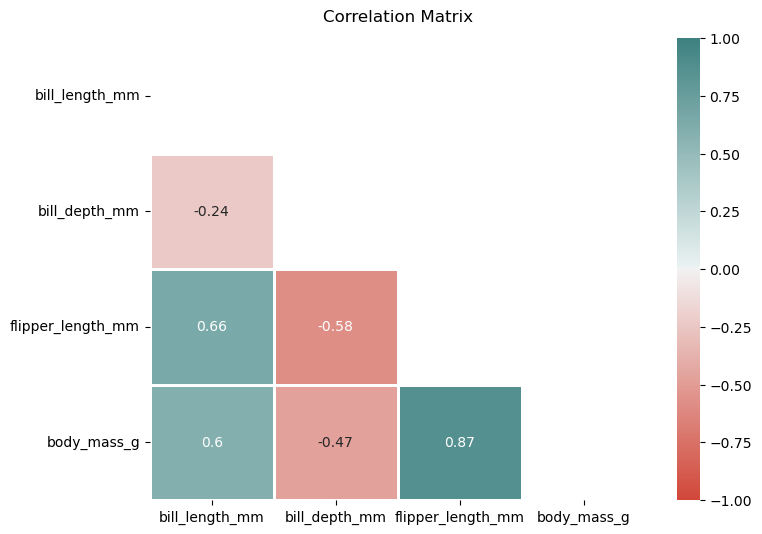

In [11]:
# First calculate correlation matrix with .corr(). Since pandas version 2.0.0, the default value of numeric_only is now False, 
# so this param needs to be set as True due to the 3 categorical variables in the dataset
corr = df.corr(numeric_only=True)

# Adjust heatmap size
plt.figure(figsize=(8, 6))

# Remove the redudant upper half as well as the diagonal line of 1s to declutter the visual
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, 
            linewidth=1, 
            cmap=sns.diverging_palette(15, 190, as_cmap=True), 
            vmax=1, 
            vmin=-1,
            mask=mask )

# As Seaborn is built on top of matplolib we can use the title function
plt.title('Correlation Matrix',fontdict={'fontsize':12}, pad=12, loc='center')



---

## 6. <a id='toc6_'></a>[Insights and Conclusion](#toc0_)

----

## 7. <a id='toc7_'></a>[Notes](#toc0_)

1. Markdowns formatting of this Jupyter Notebook were based on:
* [The Jupyter Notebook Formatting Guide](https://medium.com/pythoneers/jupyter-notebook-101-everything-you-need-to-know-56cda3ea76ef) by Raghu Prodduturi
* [Markdown Cheat Sheet](https://markdownguide.offshoot.io/cheat-sheet/)
* [Markdown Extended Syntax](https://markdownguide.offshoot.io/extended-syntax)


---
## 8. <a id='toc8_'></a>[End](#toc0_)
